<a href="https://colab.research.google.com/github/Kasula-Lohith-Kumar/ScalerProjects/blob/main/JamboreeEducationBusinessCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<table align="center" width="100%">
    <tr>
        <td width="35%">
            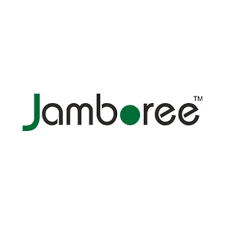
        </td>
        <td>
            <div align="center">
                <font color="#008000" size="8">
                    <b>Jamboree Business Case</b>
                </font>
                <br>
                <br>
                <br>
                <font color="#000000" size="4">
                    <b>by Lohith Kumar Kasula</b>
                </font>
            </div>
        </td>
    </tr>
</table>


#**<font color='green'>Problem Statement :</font>**

* Jamboree is a renowned educational institution that has successfully assisted
numerous students in gaining admission to top colleges abroad. With their proven problem-solving methods, they have helped students achieve exceptional scores on exams like GMAT, GRE, and SAT with minimal effort.

* To further support students, Jamboree has recently introduced a new feature on their
 website. This feature enables students to assess their probability of admission to Ivy
 League colleges, considering the unique perspective of Indian applicants.

* By conducting a thorough analysis, we can assist Jamboree in understanding the crucial
 factors impacting graduate admissions and their interrelationships. Additionally, we can
 provide predictive insights to determine an individual's admission chances based on
 various variables.



#**<font color='green'>Column Profiling :</font>**

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose
* Letter of Recommendation Strength (out of 5)
*Undergraduate GPA (out of 10)
*Research Experience (either 0 or 1)
*Chance of Admit (ranging from 0 to 1)

#**<font color='green'>Importing all the requried libraries</font>**

In [ ]:
#Importing all the requried Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, kstest, ttest_ind, ttest_rel, pearsonr, spearmanr, chi2, chi2_contingency, chisquare, f_oneway
from google.colab import drive
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#**<font color='green'>Mounting the Google Drive</font>**


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/JamboreeBusinessCase/dataset.csv')

In [ ]:
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


#**<font color='green'>Basic analysis on the given dataset</font>**

##**<font color='grey'>Shape of the data</font>**

In [ ]:
df.shape

(500, 9)

##**<font color='grey'>Coulmns</font>**

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.columns = np.array(['SerialNo', 'GRE_Score', 'TOEFL_Score', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research', 'ChanceOfAdmit'])
df.columns

Index(['SerialNo', 'GRE_Score', 'TOEFL_Score', 'UniversityRating', 'SOP',
       'LOR', 'CGPA', 'Research', 'ChanceOfAdmit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo          500 non-null    int64  
 1   GRE_Score         500 non-null    int64  
 2   TOEFL_Score       500 non-null    int64  
 3   UniversityRating  500 non-null    int64  
 4   SOP               500 non-null    float64
 5   LOR               500 non-null    float64
 6   CGPA              500 non-null    float64
 7   Research          500 non-null    int64  
 8   ChanceOfAdmit     500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


##**<font color='grey'>Checking Null Values</font>**

In [ ]:
df.isna().sum()

,0
SerialNo,0
GRE_Score,0
TOEFL_Score,0
UniversityRating,0
SOP,0
LOR,0
CGPA,0
Research,0
ChanceOfAdmit,0


##**<font color='grey'>Duplicate values check</font>**

In [ ]:
df.duplicated().sum()

0

##**<font color='grey'>Describing all the columns in the given data set</font>**

In [ ]:
df.describe()

,SerialNo,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<font color ='blue'>Observation:</font>

* Most applicants have a high academic profile (GRE, TOEFL, and CGPA).
* Research experience is common but not universal.
* The chances of admission seem to be reasonably high across the dataset, but with a wide variance.
* The mean of chance of Admit is **0.72**

#**<font color='green'>Univariate Analysis</font>**

In [ ]:
df = df.set_index('SerialNo')

In [ ]:
df.head(1)

,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
SerialNo,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92


##**<font color='grey'> GRE Scores</font>**

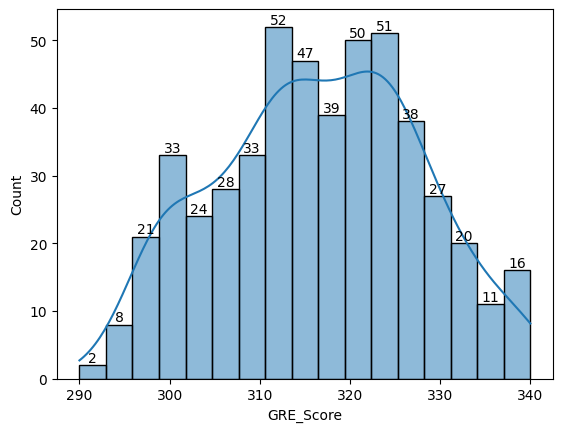

In [ ]:
ax = sns.histplot(data=df, x='GRE_Score', binwidth=3, kde=True)
for _ in ax.patches:
  x = _.get_x()
  y = _.get_height()
  w = _.get_width()
  p = (x+w/2, y)
  ax.annotate(y, p, ha = 'center', va ='bottom')
plt.show()

<font color=blue>Observation:</font> The distribution is close to Normal/Gaussian

###**<font color='orange'>Normality Test</font>**

####**<font color='brown'>QQ Plot</font>**

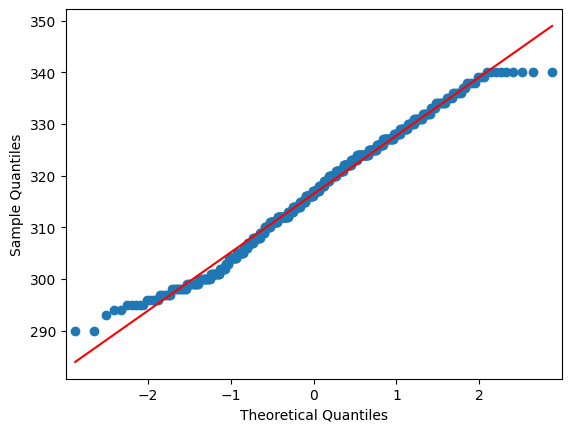

In [ ]:
qqplot(df['GRE_Score'], line='s')
plt.show()

####**<font color='brown'>Shapiro Wilk Test</font>**

In [ ]:
# H0: Data is Normally distributed
# Ha: Data is not Normally distributed
stats, p_value = shapiro(df['GRE_Score'])
print('stats :', stats)
print('p_value', round(p_value, 2))

alpha = 0.05
if p_value < alpha:
  print('Data is not Normally distributed')
else:
  print('Data Normally distributed')

stats : 0.9857423277772411
p_value 0.0
Data is not Normally distributed


<font color='blue'>Observation:</font>   
The Normality is statistically not significant with alpha 0.05 but if we observe the historam plot we can say that distibution is almost normal, Hence we can use the  standard scaler for scaling the features

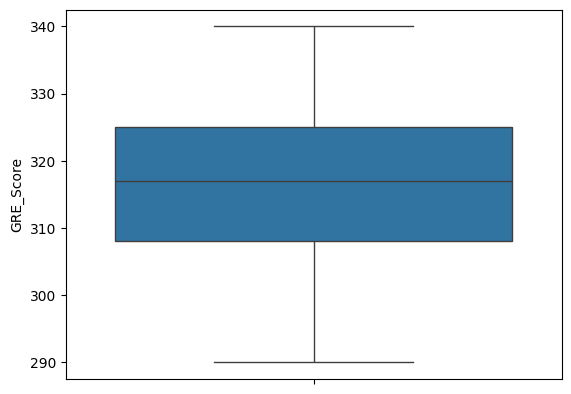

In [ ]:
sns.boxplot(data = df, y='GRE_Score')
plt.show()

<font color='blue'>Observation: </font>There are No outliers

##**<font color='grey'>TOFEL Scores</font>**

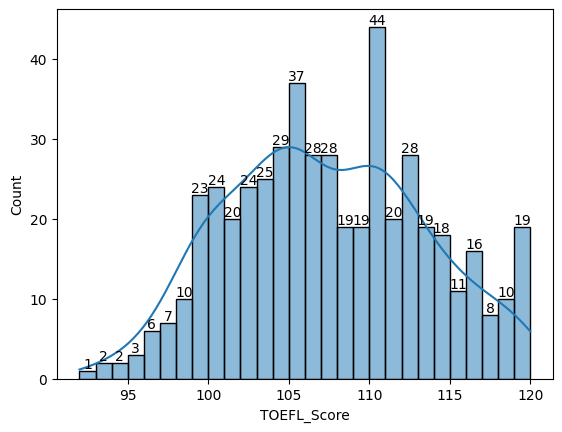

In [ ]:
ax = sns.histplot(data=df, x='TOEFL_Score', binwidth=1, kde=True)
for _ in ax.patches:
  x = _.get_x()
  y = _.get_height()
  w = _.get_width()
  p = (x+w/2, y)
  ax.annotate(y, p, ha = 'center', va ='bottom')
plt.show()

###**<font color='orange'>Normality Test</font>**

####**<font color='brown'>QQ Plot</font>**


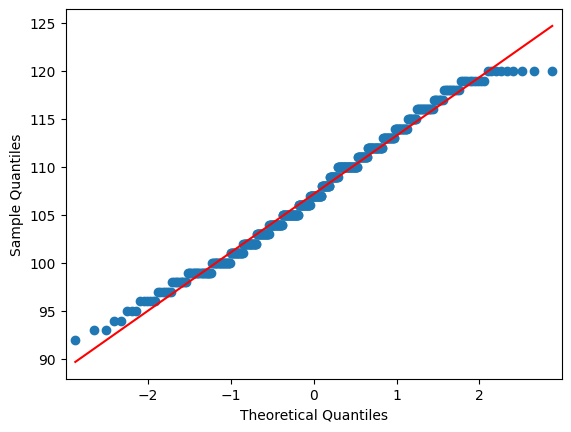

In [ ]:
qqplot(df['TOEFL_Score'], line='s')
plt.show()

####**<font color='brown'>Shapiro Wilk Test</font>**

In [ ]:
# H0: Data is Normally distributed
# Ha: Data is not Normally distributed
stats, p_value = shapiro(df['TOEFL_Score'])
print('stats :', stats)
print('p_value', round(p_value, 2))

alpha = 0.05
if p_value < alpha:
  print('Data is not Normally distributed')
else:
  print('Data Normally distributed')

stats : 0.9858326279517755
p_value 0.0
Data is not Normally distributed


<font color='blue'>Observation:</font>   
The Normality is statistically not significant with alpha 0.05 but if we observe the historam plot we can say that distibution is almost normal, Hence we can use the  standard scaler for scaling the features

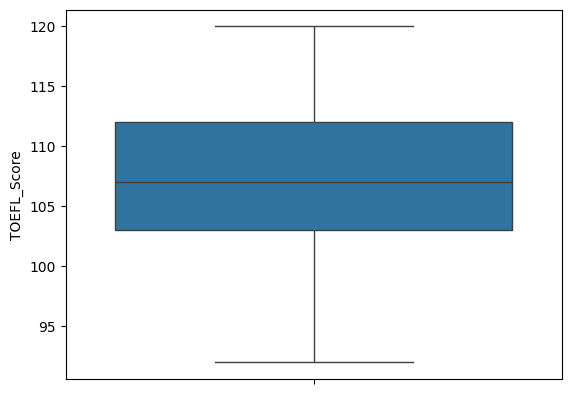

In [ ]:
sns.boxplot(data = df, y='TOEFL_Score')
plt.show()

<font color='blue'>Observation: </font>There are No outliers

##**<font color='grey'>University Rating</font>**

In [ ]:
URCount = df['UniversityRating'].value_counts()
URPercentage = df['UniversityRating'].value_counts(normalize=True)

df_UniversityRating = pd.DataFrame({'Count':URCount, 'Percent':URPercentage}, index=URCount.index)
df_UniversityRating

,Count,Percent
UniversityRating,,
3,162,0.324
2,126,0.252
4,105,0.210
5,73,0.146
1,34,0.068


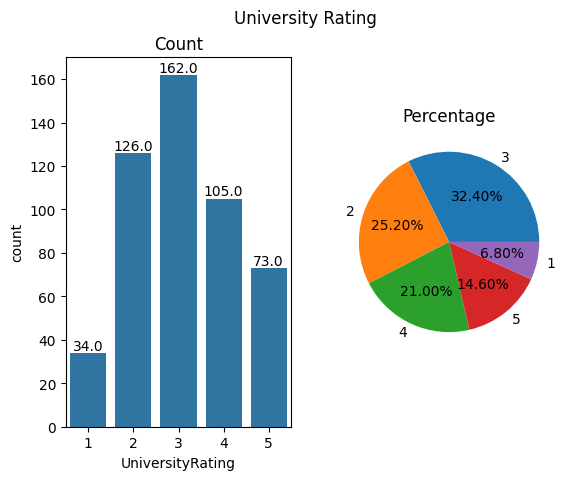

In [ ]:
fig = plt.figure()
sp = plt.subplot(1,2,1)
plt.suptitle('University Rating')
plt.title('Count')
ax = sns.countplot(data=df,x='UniversityRating')
for _ in ax.patches:
  x = _.get_x()
  y = _.get_height()
  w = _.get_width()
  p = (x+w/2, y)
  ax.annotate(y, p, ha = 'center', va ='bottom')
plt.subplot(1,2,2)
plt.title('Percentage')
plt.pie(df['UniversityRating'].value_counts(), autopct='%0.2f%%', labels=df['UniversityRating'].value_counts().index)
plt.show()

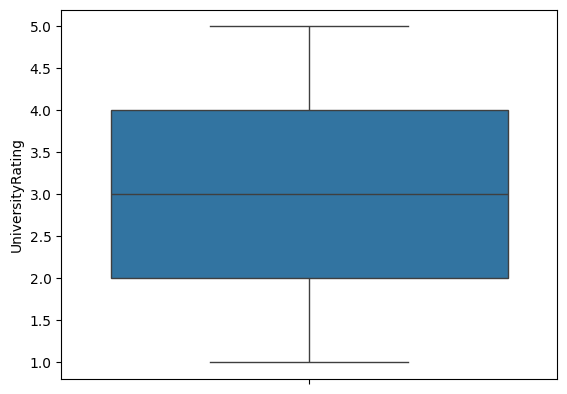

In [ ]:
sns.boxplot(data = df, y='UniversityRating')
plt.show()

<font color='blue'>Observation: </font>There are No outliers

##**<font color='grey'>Statement Of Purpose (SOP)</font>**

In [ ]:
df['SOP'].value_counts()

SOPCount = df['SOP'].value_counts()
SOPPercentage = df['SOP'].value_counts(normalize=True)

df_SOP = pd.DataFrame({'Count':SOPCount, 'Percent':SOPPercentage}, index=SOPCount.index)
df_SOP

,Count,Percent
SOP,,
4.0,89,0.178
3.5,88,0.176
3.0,80,0.160
2.5,64,0.128
4.5,63,0.126
2.0,43,0.086
5.0,42,0.084
1.5,25,0.050
1.0,6,0.012


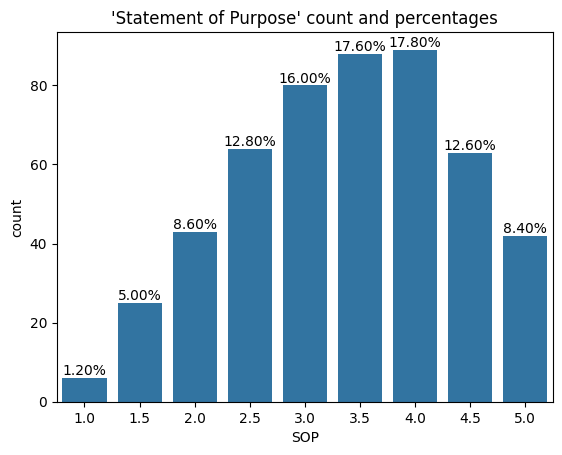

In [ ]:
plt.title("'Statement of Purpose' count and percentages")
ax = sns.countplot(data=df,x='SOP')
total = len(df['SOP'])
for i in ax.patches:
  x = i.get_x() + i.get_width()/2
  y = i.get_height()
  percentage = f'{(y/total)*100:.2f}'
  ax.annotate(f'{percentage}%', (x,y), ha='center', va='bottom')
plt.show()

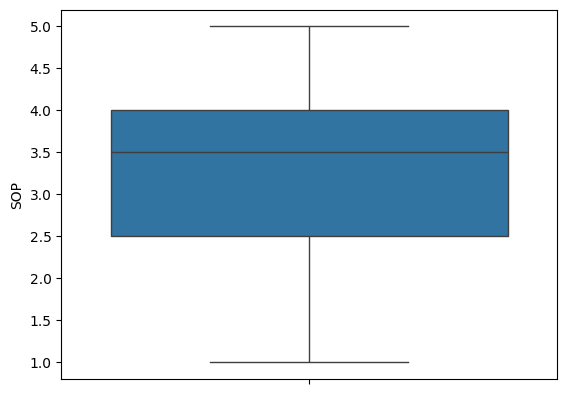

In [ ]:
sns.boxplot(data = df, y='SOP')
plt.show()

<font color='blue'>Observation: </font>There are No outliers

##**<font color='grey'>Letter of Recommendation Strength (LOR)</font>**

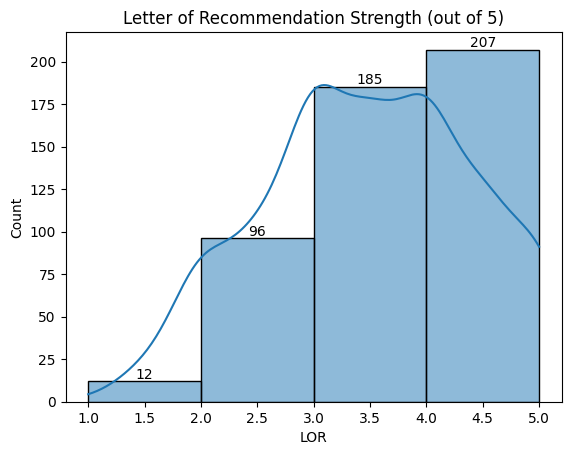

In [ ]:
ax = sns.histplot(data=df, x='LOR', binwidth=1, kde=True)
for _ in ax.patches:
  x = _.get_x()
  y = _.get_height()
  w = _.get_width()
  p = (x+w/2, y)
  ax.annotate(y, p, ha = 'center', va ='bottom')
  plt.title('Letter of Recommendation Strength (out of 5)')
plt.show()

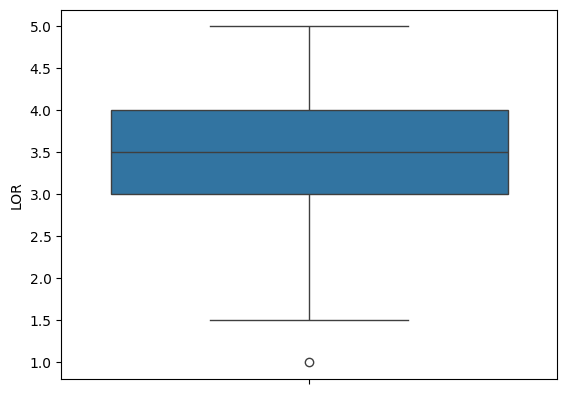

In [ ]:
sns.boxplot(data = df, y='LOR')
plt.show()

<font color='blue'>Observation:</font> Found an outlier, we will drop it

In [ ]:
df[df['LOR'] == 1]

,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
SerialNo,,,,,,,,
348,299,94,1,1.0,1.0,7.34,0,0.42


In [ ]:
df.drop(axis=0, index=348, inplace=True)

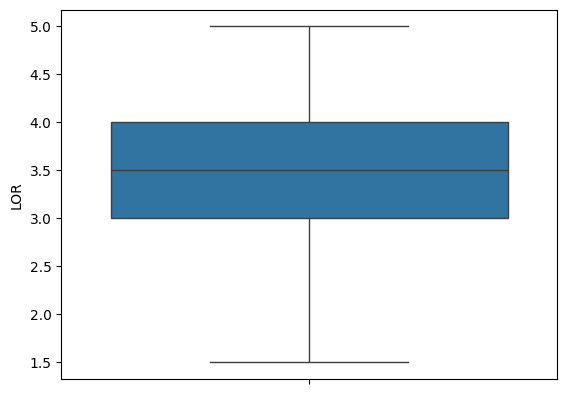

In [ ]:
sns.boxplot(data = df, y='LOR')
plt.show()

In [ ]:
df.shape

(499, 8)

##**<font color='grey'>Undergraduate GPA</font>**

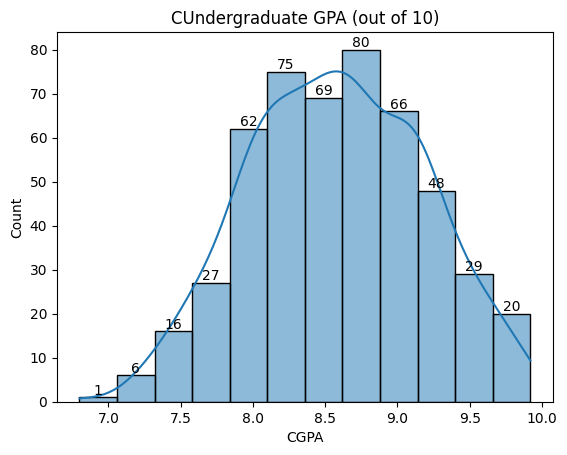

In [ ]:
ax = sns.histplot(data=df, x='CGPA', binwidth=0.25,kde=True)
for _ in ax.patches:
  x = _.get_x()
  y = _.get_height()
  w = _.get_width()
  p = (x+w/2, y)
  ax.annotate(y, p, ha = 'center', va ='bottom')
  plt.title('CUndergraduate GPA (out of 10)')
plt.show()

###**<font color='orange'>Normality Test</font>**

####**<font color='brown'>QQ Plot</font>**

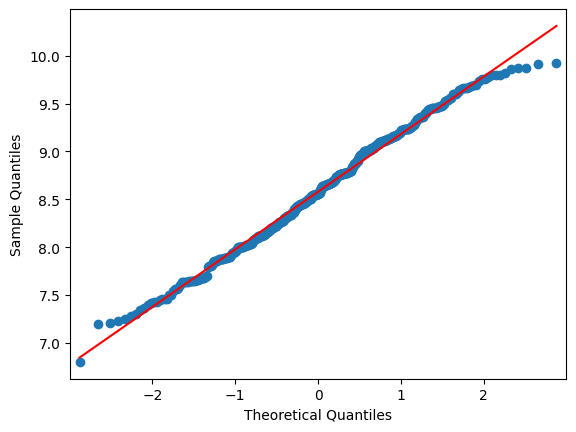

In [ ]:
qqplot(df['CGPA'], line='s')
plt.show()

####**<font color='brown'>Shapiro Wilk Test</font>**

In [ ]:
# H0: Data is Normally distributed
# Ha: Data is not Normally distributed
stats, p_value = shapiro(df['CGPA'])
print('stats :', stats)
print('p_value', round(p_value, 2))

alpha = 0.05
if p_value < alpha:
  print('Data is not Normally distributed')
else:
  print('Data Normally distributed')

stats : 0.9922272016508045
p_value 0.01
Data is not Normally distributed


<font color='blue'>Observation:</font>   
The Normality is statistically not significant with alpha 0.05 but if we observe the historam plot we can say that distibution is almost normal, Hence we can use the  standard scaler for scaling the features

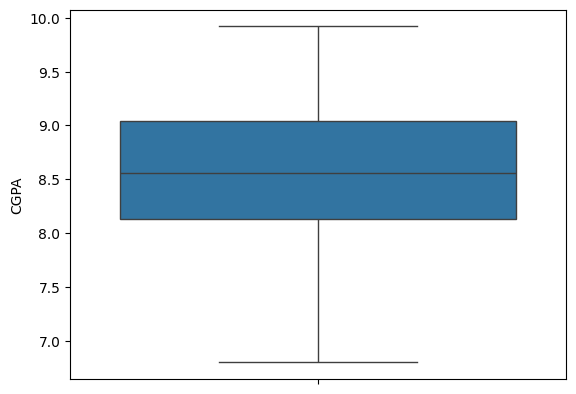

In [ ]:
sns.boxplot(data = df, y='CGPA')
plt.show()

##**<font color='grey'>Research Experience</font>**

In [ ]:
research_value_counts = df['Research'].value_counts()
research_value_counts

,count
Research,
1,280
0,219


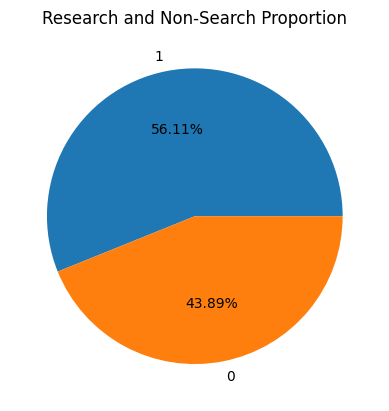

In [ ]:
plt.pie(research_value_counts, labels=research_value_counts.index, autopct='%0.2f%%')
plt.title('Research and Non-Search Proportion')
plt.show()

##**<font color='grey'>Change of Admit</font>**

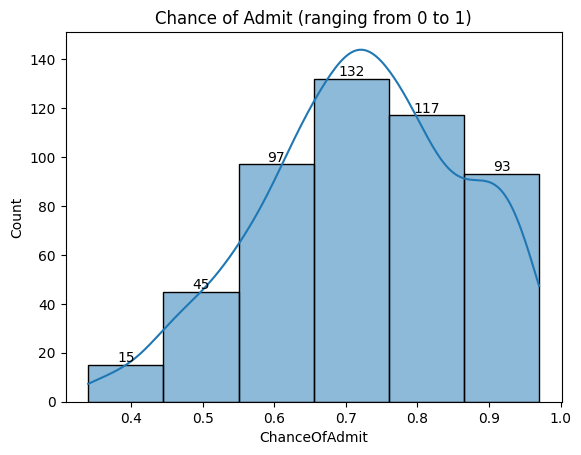

In [ ]:
ax = sns.histplot(data=df, x='ChanceOfAdmit', binwidth=0.1, kde=True)

for _ in ax.patches:
  x = _.get_x()
  y = _.get_height()
  w = _.get_width()
  p = (x+w/2, y)
  ax.annotate(y, p, ha = 'center', va ='bottom')
  plt.title('Chance of Admit (ranging from 0 to 1)')
plt.show()

#<font color='green'>Bi-Variate Analysis</font>

In [ ]:
df.head(2)

,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
SerialNo,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76


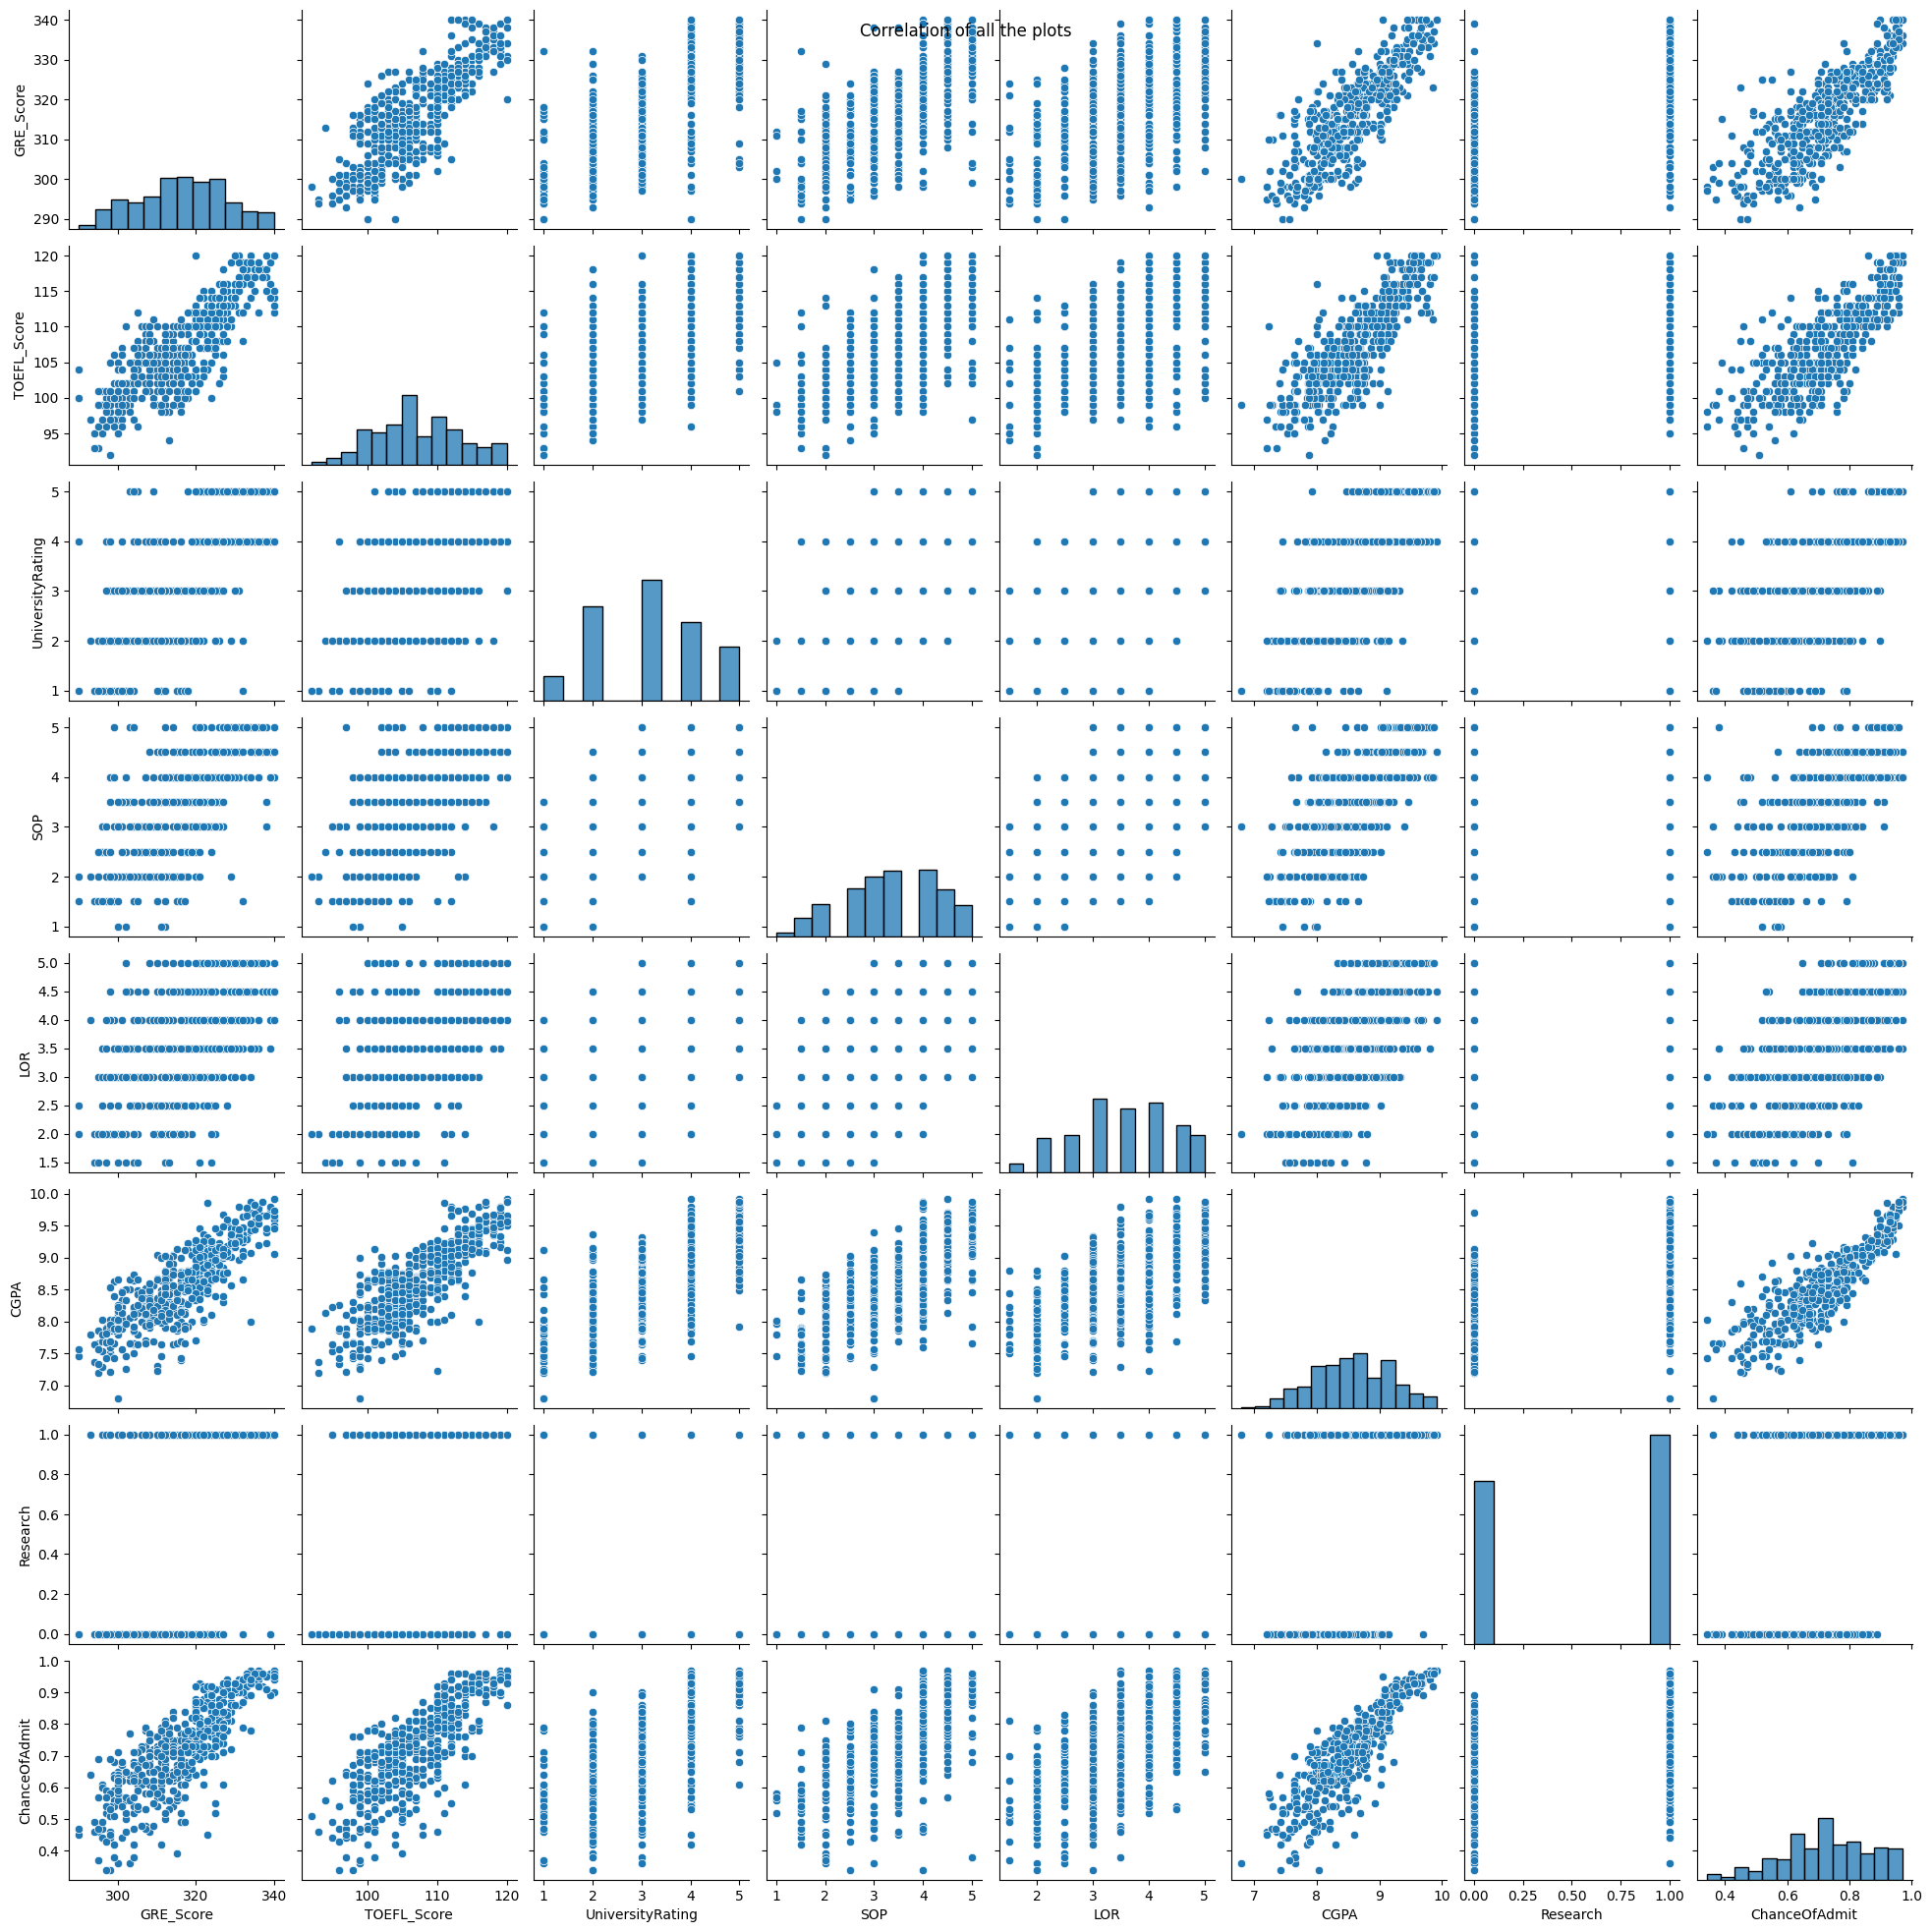

In [ ]:
sns.pairplot(y_vars=['GRE_Score', 'TOEFL_Score', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research', 'ChanceOfAdmit'], x_vars=['GRE_Score', 'TOEFL_Score', 'UniversityRating', 'SOP', 'LOR', 'CGPA', 'Research', 'ChanceOfAdmit'], data=df)
plt.suptitle('Correlation of all the plots')
plt.show()

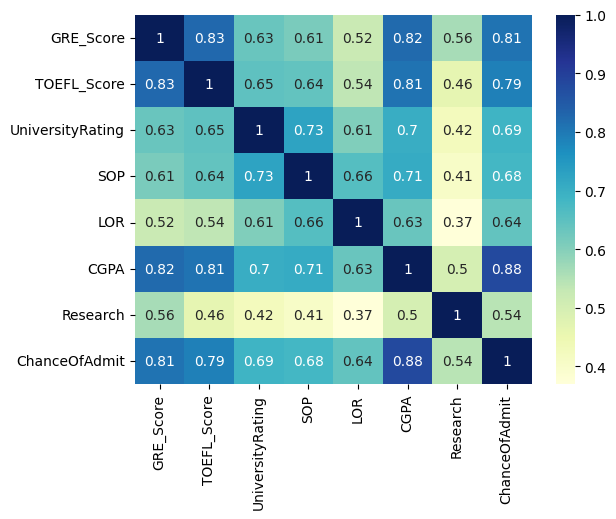

In [ ]:
sns.heatmap(data=df.corr(), annot=True, cmap='YlGnBu')
plt.show()

<font color ='blue'>Observation: </font>

From the above heatmap we can observe that most of the variables are highly correlated.

##**<font color='grey'>Correlation Hypothesis test between 'GRE Score' and 'TOEFL Score' </font>**

In [ ]:
df_gre_tofel = df[['GRE_Score', 'TOEFL_Score']]
df_gre_tofel.head(1)

,GRE_Score,TOEFL_Score
SerialNo,,
1,337,118


In [ ]:
df_gre_tofel_corr = df_gre_tofel.corr()
df_gre_tofel_corr

,GRE_Score,TOEFL_Score
GRE_Score,1.000000,0.826354
TOEFL_Score,0.826354,1.000000


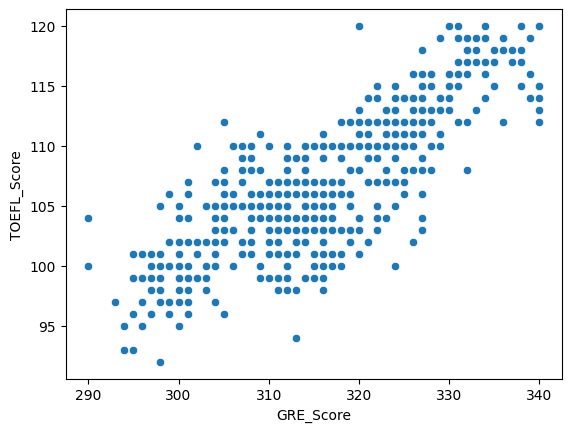

In [ ]:
sns.scatterplot(data=df_gre_tofel, x='GRE_Score', y='TOEFL_Score')
plt.show()

In [ ]:
stats, p_value = spearmanr(df_gre_tofel['GRE_Score'], df['TOEFL_Score'])
print(stats, p_value)

0.8229650781793522 3.835442572728973e-124


In [ ]:
# H0: There is no correlation between the GRE Score and TOEFL Scores
# Ha: There is a significant correlation between the GRE and TOEFL Scores
alpha =0.05
if p_value < alpha:
  print('There is a significant correlation between the GRE and TOEFL Scores')
else:
  print('There is no correlation between the GRE Score and TOEFL Scores')

There is a significant correlation between the GRE and TOEFL Scores


##**<font color='grey'>Correlation Hypothesis test between 'GRE Score' and 'CGPA' </font>**

In [ ]:
df_gre_cgpa = df[['GRE_Score', 'CGPA']]
df_gre_cgpa.head(1)

,GRE_Score,CGPA
SerialNo,,
1,337,9.65


In [ ]:
df_gre_cgpa_corr = df_gre_cgpa.corr()
df_gre_cgpa_corr

,GRE_Score,CGPA
GRE_Score,1.000000,0.824973
CGPA,0.824973,1.000000


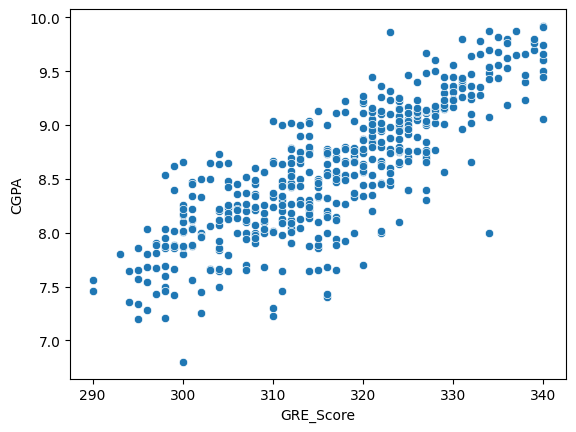

In [ ]:
sns.scatterplot(data=df_gre_cgpa, x='GRE_Score', y='CGPA')
plt.show()

In [ ]:
stats, p_value = spearmanr(df_gre_cgpa['GRE_Score'], df['CGPA'])
print(stats, p_value)

0.828411531952141 3.3928868317446596e-127


In [ ]:
# H0: There is no correlation between the GRE Score and CGPA
# Ha: There is a significant correlation between the GRE and CGPA
alpha =0.05
if p_value < alpha:
  print('There is a significant correlation between the GRE and CGPA')
else:
  print('There is no correlation between the GRE Score and CGPA')

There is a significant correlation between the GRE and CGPA


##**<font color='grey'>Correlation Hypothesis test between 'TOEFL Score' and 'CGPA' </font>**

In [ ]:
df_toefl_cgpa = df[['TOEFL_Score', 'CGPA']]
df_toefl_cgpa.head(1)

,TOEFL_Score,CGPA
SerialNo,,
1,118,9.65


In [ ]:
df_toefl_cgpa_corr = df_toefl_cgpa.corr()
df_toefl_cgpa_corr

,TOEFL_Score,CGPA
TOEFL_Score,1.000000,0.808885
CGPA,0.808885,1.000000


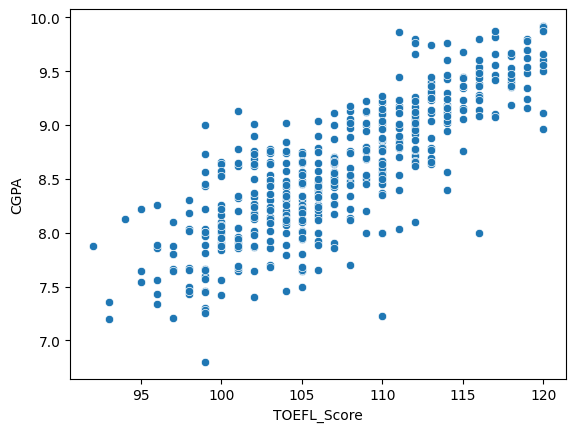

In [ ]:
sns.scatterplot(data=df_toefl_cgpa, x='TOEFL_Score', y='CGPA')
plt.show()

In [ ]:
stats, p_value = spearmanr(df_toefl_cgpa['TOEFL_Score'], df_toefl_cgpa['CGPA'])
print(stats, p_value)

0.8083962563927932 1.8209996573114182e-116


In [ ]:
# H0: There is no correlation between the TOEFL Score and CGPA
# Ha: There is a significant correlation between the TOEFL and CGPA
alpha =0.05
if p_value < alpha:
  print('There is a significant correlation between the TOEFL and CGPA')
else:
  print('There is no correlation between the TOEFL Score and CGPA')

There is a significant correlation between the TOEFL and CGPA


##**<font color ='grey'>T-test Hypothesis Testing Between GRE Score and Research </font>**

**H0 :** The mean GRE Score of students who done research is not greater than those who haven't done

**Ha :** The mean GRE Score of students who done research is greater than those who haven't done


In [ ]:
df_gre_research = df[['GRE_Score', 'Research']]
df_gre_research.head(1)

,GRE_Score,Research
SerialNo,,
1,337,1


In [ ]:
gre_search_done = df_gre_research[df_gre_research['Research'] == 1]['GRE_Score']
gre_no_search = df_gre_research[df_gre_research['Research'] == 0]['GRE_Score']

In [ ]:
stats, p_value = ttest_ind(gre_search_done, gre_no_search, alternative='greater')
print(stats, p_value)

15.145961575998008 3.493685214316081e-43


In [ ]:
if p_value < alpha:
  print('Reject H0')
  print("The mean GRE Score of students who done research is greater than those who haven't done")
else:
  print('Fail to Reject H0')
  print("The mean GRE Score of students who done research is not greater than those who haven't done")

Reject H0
The mean GRE Score of students who done research is greater than those who haven't done


##**<font color ='grey'>T-test Hypothesis Testing Between GRE Score and Research </font>**

**H0 :** The mean TOEFL Score of students who done research is not greater than those who haven't done

**Ha :** The mean TOEFL Score of students who done research is greater than those who haven't done

In [ ]:
df_toefl_research = df[['TOEFL_Score', 'Research']]
df_toefl_research.head(1)

,TOEFL_Score,Research
SerialNo,,
1,118,1


In [ ]:
tofel_search_done = df_toefl_research[df_toefl_research['Research'] == 1]['TOEFL_Score']
tofel_no_search = df_toefl_research[df_toefl_research['Research'] == 0]['TOEFL_Score']

In [ ]:
stats, p_value = ttest_ind(tofel_search_done, tofel_no_search, alternative='greater')
print(stats, p_value)


11.706046956446471 2.00480068615406e-28


In [ ]:
if p_value < alpha:
  print('Reject H0')
  print("The mean TOEFL Score of students who done research is greater than those who haven't done")
else:
  print('Fail to Reject H0')
  print("The mean TOEFL Score of students who done research is not greater than those who haven't done")

Reject H0
The mean TOEFL Score of students who done research is greater than those who haven't done


##**<font color ='grey'>T-test Hypothesis Testing Between CGPA and Research </font>**

**H0 :** The mean CGPA of students who done research is not greater than those who haven't done

**Ha :** The mean CGPA of students who done research is greater than those who haven't done

In [ ]:
df_CGPA_research = df[['CGPA', 'Research']]
df_CGPA_research.head(1)

,CGPA,Research
SerialNo,,
1,9.65,1


In [ ]:
cgpa_search_done = df_CGPA_research[df_CGPA_research['Research'] == 1]['CGPA']
cgpa_no_search = df_CGPA_research[df_CGPA_research['Research'] == 0]['CGPA']

In [ ]:
stats, p_value = ttest_ind(cgpa_search_done, cgpa_no_search, alternative='greater')
print(stats, p_value)

12.851230545157055 3.869867511298936e-33


In [ ]:
if p_value < alpha:
  print('Reject H0')
  print("The mean CGPA of students who done research is greater than those who haven't done")
else:
  print('Fail to Reject H0')
  print("The mean CGPA of students who done research is not greater than those who haven't done")

Reject H0
The mean CGPA of students who done research is greater than those who haven't done


##**<font color='grey'>T-test Hypothesis Testing Between Chance of Admit and Research</font>**

**H0 :** The mean Admitted students who done research is not greater than those who haven't done

**Ha :** The mean Admitted students who done research is greater than those who haven't done

In [ ]:
df_admitResearch= df[['ChanceOfAdmit', 'Research']]
df_admitResearch.head(1)

,ChanceOfAdmit,Research
SerialNo,,
1,0.92,1


In [ ]:
admitResearchDone = df_admitResearch[df_admitResearch['Research'] == 1]['ChanceOfAdmit']
admitNoResearch = df_admitResearch[df_admitResearch['Research'] == 0]['ChanceOfAdmit']

In [ ]:
stats, p_value = ttest_ind(admitResearchDone, admitNoResearch, alternative='greater')
print(stats, p_value)

14.462011100345268 4.058747359288449e-40


In [ ]:
if p_value < alpha:
  print('Reject H0')
  print("The mean Admitted students who done research is greater than those who haven't done")
else:
  print('Fail to Reject H0')
  print("The mean Admitted students who done research is not greater than those who haven't done")

Reject H0
The mean Admitted students who done research is greater than those who haven't done


##**<font color='grey'>Correlation Hypothesis Testing Between Chance of Admit and GRE Score</font>**

**H0 :** There is no correlation between Chances of Admit and GRE Score

**Ha :** There is significant correlation between Chances of Admit and GRE Score

In [ ]:
df_admitGREScore = df[['ChanceOfAdmit', 'GRE_Score']]
df_admitGREScore.head(1)

,ChanceOfAdmit,GRE_Score
SerialNo,,
1,0.92,337


In [ ]:
df_admitGREScore.head(1)

,ChanceOfAdmit,GRE_Score
SerialNo,,
1,0.92,337


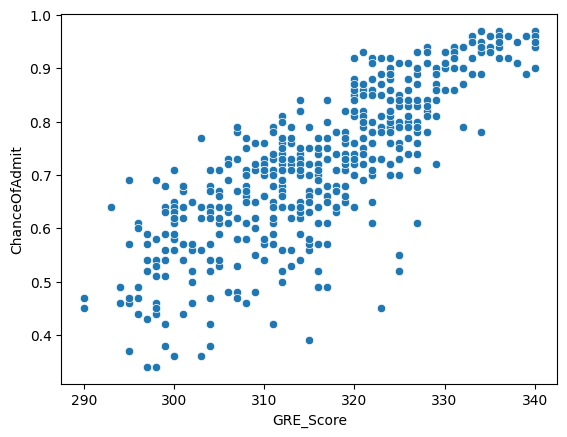

In [ ]:
sns.scatterplot(data=df, x='GRE_Score', y='ChanceOfAdmit')
plt.show()

In [ ]:
stats,p_value = spearmanr(df['GRE_Score'], df['ChanceOfAdmit'])
stats,p_value

(0.8213505490399937, 2.943133410609447e-123)

In [ ]:
if p_value < alpha:
  print('Reject H0')
  print('There is significant correlation between Chances of Admit and GRE Score')
else:
  print('Accept H0')
  print('There no correlation between Chances of Admit and GRE Score')

Reject H0
There is significant correlation between Chances of Admit and GRE Score


##**<font color='grey'>Correlation Hypothesis Testing Between Chance of Admit and TOEFL Score</font>**

**H0 :** There is no correlation between Chances of Admit and TOEFL Score

**Ha :** There is significant correlation between Chances of Admit and TOEFL Score

In [ ]:
df_admitTOEFLScore= df[['ChanceOfAdmit', 'TOEFL_Score']]
df_admitTOEFLScore.head(1)

,ChanceOfAdmit,TOEFL_Score
SerialNo,,
1,0.92,118


In [ ]:
df_admitTOEFLScore.corr()

,ChanceOfAdmit,TOEFL_Score
ChanceOfAdmit,1.000000,0.790276
TOEFL_Score,0.790276,1.000000


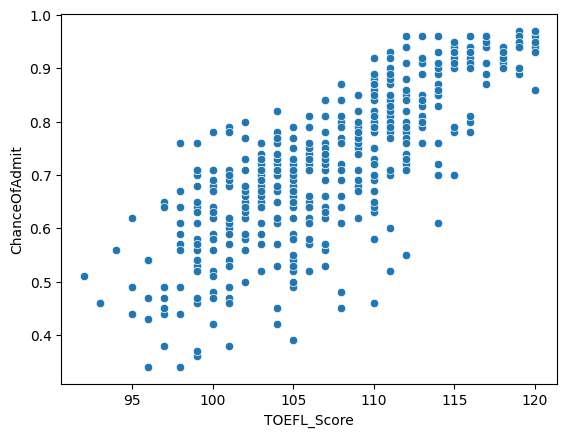

In [ ]:
sns.scatterplot(data=df_admitTOEFLScore, x='TOEFL_Score', y='ChanceOfAdmit')
plt.show()

In [ ]:
stats,p_value = spearmanr(df['TOEFL_Score'], df['ChanceOfAdmit'])
stats,p_value

(0.7924553546169134, 8.673309370818252e-109)

In [ ]:
if p_value < alpha:
  print('Reject H0')
  print('There is significant correlation between Chances of Admit and TOFEL Score')
else:
  print('Accept H0')
  print('There is no correlation between Chances of Admit and TOFEL Score')

Reject H0
There is significant correlation between Chances of Admit and TOFEL Score


##**<font color='grey'>Correlation Hypothesis Testing Between Chance of Admit and CGPA</font>**

**H0 :** There is no correlation between Chances of Admit and CGPA

**Ha :** There is significant correlation between Chances of Admit and CGPA

In [ ]:
df_admitCGPA= df[['ChanceOfAdmit', 'CGPA']]
df_admitCGPA.head(1)

,ChanceOfAdmit,CGPA
SerialNo,,
1,0.92,9.65


In [ ]:
df_admitCGPA.corr()

,ChanceOfAdmit,CGPA
ChanceOfAdmit,1.000000,0.881379
CGPA,0.881379,1.000000


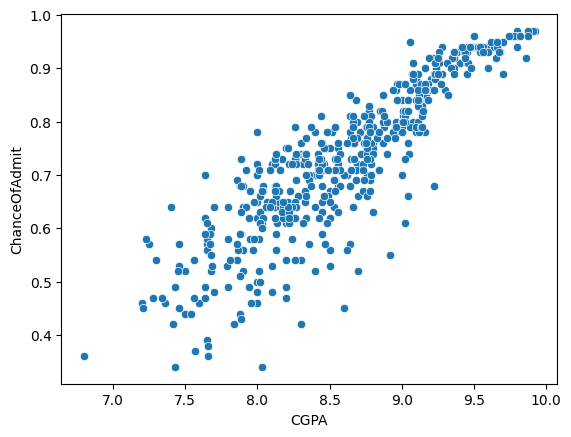

In [ ]:
sns.scatterplot(data=df_admitCGPA, x='CGPA', y='ChanceOfAdmit')
plt.show()

In [ ]:
stats,p_value = spearmanr(df['CGPA'], df['ChanceOfAdmit'])
stats,p_value

(0.8881751239524679, 5.7958267202269646e-170)

In [ ]:
if p_value < alpha:
  print('Reject H0')
  print('There is significant correlation between Chances of Admit and CGPA')
else:
  print('Accept H0')
  print('There is no correlation between Chances of Admit and CGPA')

Reject H0
There is significant correlation between Chances of Admit and CGPA


#**<font  color='green'>Scaling all the columns using Standard Scaler</font>**

In [ ]:
df.head(1)

,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
SerialNo,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 1 to 500
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GRE_Score         499 non-null    int64  
 1   TOEFL_Score       499 non-null    int64  
 2   UniversityRating  499 non-null    int64  
 3   SOP               499 non-null    float64
 4   LOR               499 non-null    float64
 5   CGPA              499 non-null    float64
 6   Research          499 non-null    int64  
 7   ChanceOfAdmit     499 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.1 KB


In [ ]:
scaler = StandardScaler()
scaler.fit(df[df.columns])
scaled_values = scaler.transform(df[df.columns])
scaled_df = pd.DataFrame(scaled_values, columns=df.columns)
scaled_df.head(1)

,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,1.818692,1.781173,0.773761,1.137997,1.100455,1.77841,0.884388,1.406887


In [ ]:
scaled_df.describe()

,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-6.051717e-16,3.987013e-16,-7.119667e-18,-5.695733e-17,-4.627783e-17,3.210970e-15,-8.899583e-18,6.407700e-17
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-2.352419e+00,-2.514168e+00,-1.858785e+00,-2.414303e+00,-2.164918e+00,-2.953690e+00,-1.130725e+00,-2.721484e+00
25%,-7.549724e-01,-6.969086e-01,-9.812696e-01,-8.918886e-01,-5.322318e-01,-7.453769e-01,-1.130725e+00,-6.572985e-01
50%,4.375105e-02,-3.608695e-02,-1.037543e-01,1.230542e-01,1.199703e-02,-3.141091e-02,8.843884e-01,-1.668922e-02
75%,7.537274e-01,7.899401e-01,7.737610e-01,6.305256e-01,5.562259e-01,7.655743e-01,8.843884e-01,6.950989e-01
max,2.084933e+00,2.111583e+00,1.651276e+00,1.645468e+00,1.644684e+00,2.226714e+00,8.843884e-01,1.762781e+00


In [ ]:
y = scaled_df['ChanceOfAdmit']
X =  scaled_df.drop('ChanceOfAdmit', axis=1)
X.shape, y.shape

((499, 7), (499,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((349, 7), (349,))

In [ ]:
X_test.shape, y_test.shape

((150, 7), (150,))

#**<font color = 'green'>Regression model with single feature</font>**


In [ ]:
X_GRE = X[['GRE_Score']]
X_GRE_train = X_train[['GRE_Score']]
X_GRE_test = X_test[['GRE_Score']]

In [ ]:
model = LinearRegression()
model.fit(X_GRE_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.77772089])

In [ ]:
model.intercept_

0.0326627422777073

In [ ]:
y_hat = model.predict(X_GRE_test)

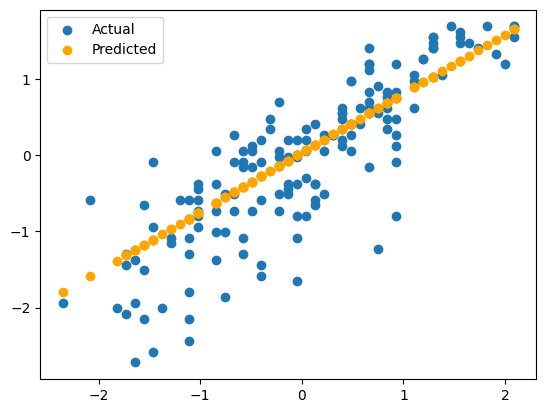

In [ ]:
fig = plt.figure()
plt.scatter(X_GRE_test, y_test, label='Actual')
plt.scatter(X_GRE_test, y_hat, label='Predicted', color='orange')
plt.legend()
plt.show()

#**<font color='green'>Multivariable modeling </font>**

In [ ]:
print(X.shape, y.shape)

(499, 7) (499,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 0.10046747,  0.15858282,  0.08305617, -0.02006627,  0.10763832,
        0.48406977,  0.10831182])

In [ ]:
model.intercept_

0.013235063408648697

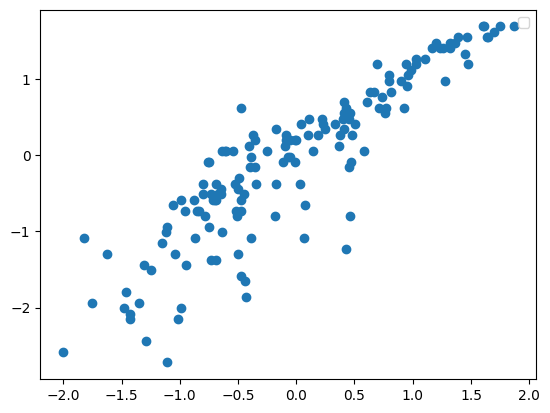

In [ ]:
plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat, y_test)
plt.legend()
plt.show()

In [ ]:
model.score(X_train, y_train)

0.8284562334742129

In [ ]:
model.score(X_test, y_test)

0.7959612316753432

#<font color='green'>**Model building using stats model**</font>

In [ ]:
X_sm = sm.add_constant(X_train)

sm_model = sm.OLS(y_train, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     235.3
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          2.12e-126
Time:                        11:27:00   Log-Likelihood:                -180.35
No. Observations:                 349   AIC:                             376.7
Df Residuals:                     341   BIC:                             407.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0132      0.022  

In [ ]:
y_predicted = sm_model.predict(X_sm)
y_predicted

,0
61,-0.740028
432,0.182680
39,-0.972811
373,-1.096693
230,-0.070511
...,...
255,-0.118980
72,1.229444
396,1.309221
235,0.990225


#**<font color='green'>VIF of Full Regression model including all the features</font>**

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# vif  = pd.DataFrame(X_train, columns = df.columns)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.50
0,GRE_Score,4.19
1,TOEFL_Score,3.91
2,UniversityRating,3.02
3,SOP,3.00
4,LOR,2.01
6,Research,1.56


#<font color='green'>**Checking Assumptions of Linear Regression**</font>

##<font color='grey'>**1. Linearity:**</font>

The relationship between the dependent and independent variables should be linear.

<font color='blue'>Observation:</font> From the above bi-variate analysis from correlation plots the features **TOEFL score, GRE Score, CGPA** are Linearly correlated to the target variable **Chance of Admit**.

##**<font color='grey'>2. No or Low Multicollinearity</font>**


The independent variables should not highly correlated with each other.

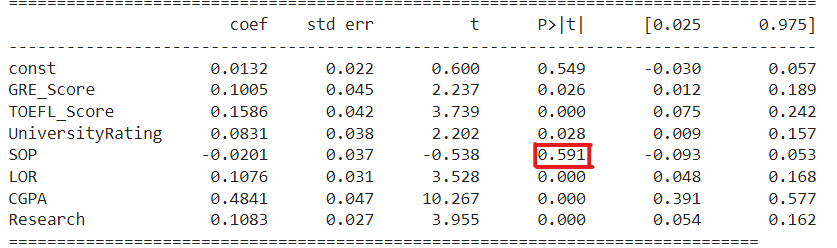

From the above OLS model summary we can observe that the P-value of SOP is very high which implies that there is more correlation of this feature with other independent features, Hence we can drop it.

In [ ]:
X_train.head(1)

,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research
61,-0.843719,-1.027319,-0.103754,0.630526,-0.532232,-0.62915,-1.130725


In [ ]:
updatedXTrain = X_train.drop(columns = 'SOP')
updatedXTrain.head(1)

,GRE_Score,TOEFL_Score,UniversityRating,LOR,CGPA,Research
61,-0.843719,-1.027319,-0.103754,-0.532232,-0.62915,-1.130725


In [ ]:
sm_model = sm.OLS(y_train, updatedXTrain).fit()
print(sm_model.summary())

                                 OLS Regression Results                                
Dep. Variable:          ChanceOfAdmit   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              275.8
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                   5.76e-128
Time:                        11:28:20   Log-Likelihood:                         -180.67
No. Observations:                 349   AIC:                                      373.3
Df Residuals:                     343   BIC:                                      396.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

<font color='blue'>Observation:</font> We can Observe that after removing the SOP feature, the model's R-square and Adjusted R-square reamins same

##<font color='grey'>**3. Residual errors**</font>

The errors should follow a normal distribution.

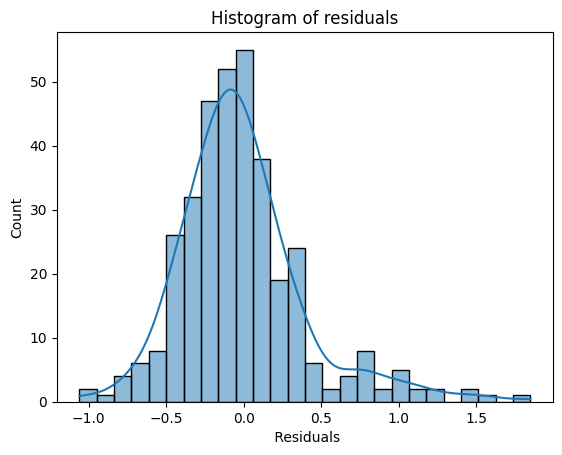

In [ ]:
predicted = sm_model.predict(updatedXTrain)
residuals = predicted - y_train
sns.histplot(residuals, kde=True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")
plt.show()

<font color='blue'>Observation :</font>From the above histogram plot we can say that the residual data is normally distributed

##**<font color = 'grey'>4. Homoscedasticity</font>**
The variance of the errors should be constant across all levels of the independent variables.

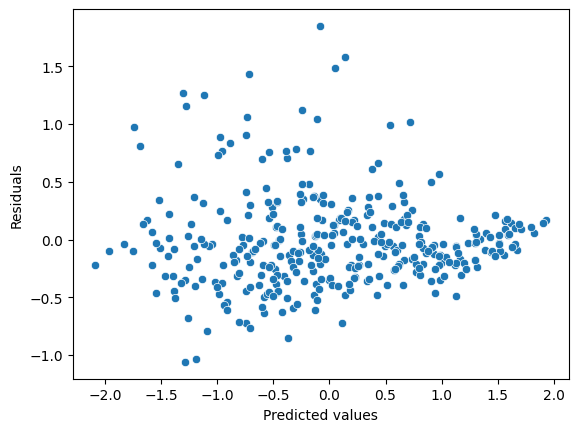

In [ ]:
predicted = sm_model.predict(updatedXTrain)
residuals = predicted - y_train
sns.scatterplot(y=residuals, x=predicted)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# H0: The data follows homoscedastisity
# Ha: The data follows hetroscedastisity
alpha = 0.05
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, updatedXTrain)
stats, p_vlaue = lzip(name, test)
print(stats, p_vlaue)
if p_vlaue[1] < alpha:
  print('Reject H0')
  print('The data follows hetroscedastisity')
else:
  print('Fail to Reject H0')
  print('The data follows homoscedastisity')


('F statistic', 1.1070766294746144) ('p-value', 0.2548573633908078)
Fail to Reject H0
The data follows homoscedastisity


<font color='blue'>Observation :</font>

From the goldfeld-quandt test:



*   F Statistic comes out to be 1.107 => Implying minimal difference in variance between groups
*   p-value of 0.254 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

##<font color = 'grey'>**5.Mean of residulas**</font>

In [ ]:
np.mean(residuals)

-0.012698635465075254

<font color = 'blue'>Observation :</font> The mean of the residuals are approximately zero

##<font color = 'grey'>**6. No Autocorrelation**</font>

<font color='blue'>Observation:</font> Autocorrelation can be performed only when the time series data is involved, Here there is no time series data.

#**<font color='green'>Model performance evaluation**</font>

##<font color='grey'>**1. MAE**</font>

In [ ]:
mae = mean_absolute_error(y_train, predicted)
print(f'Train MAE: {mae}')
y_test_pred = sm_model.predict(X_test[updatedXTrain.columns])
mae = mean_absolute_error(y_test, y_test_pred)
print(f'Test MAE: {mae}')

Train MAE: 0.2914182104171293
Test MAE: 0.3380303725927584


##<font color='grey'>**2. RSME**</font>

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, predicted))
print(f'Train RMSE: {rmse}')
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Test RMSE: {rmse}')

Train RMSE: 0.4060540330809976
Test RMSE: 0.4679811979036078


##<font color='grey'>**3. R Square**</font>

In [ ]:
train_r2 = r2_score(y_train, predicted)
print(f'Train R-Squared: {train_r2}')

test_r2 = r2_score(y_test, y_test_pred)
print(f'Test R-Squared: {test_r2}')

Train R-Squared: 0.8281418006496993
Test R-Squared: 0.7983573530550577


##<font color='grey'>**4. Adjusted R Square**</font>

In [ ]:
n = len(y_train)
p = updatedXTrain.shape[1]

adjusted_r2 = 1 - (1 - train_r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-Squared: {adjusted_r2}')

adjusted_r2 = 1 - (1 - test_r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-Squared: {adjusted_r2}')

Adjusted R-Squared: 0.8251267445207466
Adjusted R-Squared: 0.794819762757778


#<font color='green'>**Overall Conclusion by comparing both Train and Test Performance**</font>




*   The **MAE and RMSE** values are close for **both training and test** sets, which indicates **consistent performance** across both datasets, suggesting that the model is not overfitting.
*   The **R-squared** and adjusted **R-squared** values are **both high (>0.8)**, indicating that the model captures most of the variance in the data and has a good fit.
*   The small differences between the train and test metrics indicate that the **model generalizes well to unseen data**.

##<font color='green'>**Comments on the performance measures**</font>

The model appears to be performing well, as it shows:



*   **High accuracy** in explaining the variability of the data (R-squared).
* **Consistent error rates** across both training and test sets (MAE and RMSE).
*   **No signs of overfittingor underfitting**. No Need to Perform Lasso or ridge Regularization
*   We can conclude that this is a **well-performing model**, suitable for use in predicting outcomes based on the input data.